## **CODE KELOMPOK 14**  

**ANGGOTA KELOMPOK:**  

|No.|Nama|NPM|
|:--:|:----|:----:|
|1|Reza Putri Angga|22083010006|
|2|Daffin Tanjiro Widison|22083010010|

---
### **Daftar isi:**
* **Import**
 * Library
 * Data
* **Pengenalan Data**
 * Observasi & Variabel
 * Data yang Hilang

📝**Note:** Daftar isi dapat dibuka pada _table of contents_ letaknya di pojok kiri atas layar dengan simbol 3 titik dan 3 garis.

---

> Data yang digunakan pada kode program:  
 https://opendata.jabarprov.go.id/id/dataset/jumlah-kasus-penyakit-berdasarkan-jenis-penyakit-di-jawa-barat

---

# **Import**

## **Library**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib_venn import venn2, venn3, venn2_circles, venn3_circles

## **Data**

In [2]:
# Mengambil data melalui URL
url = 'https://drive.google.com/file/d/14O0T6yLyDHE62ueqvJqWEUBbxzYDX5SI/view?usp=drive_link'
url = 'https://drive.google.com/uc?id=' + url.split('/')[-2]

data = pd.read_csv(url)
data

,id,kode_provinsi,nama_provinsi,kode_kabupaten_kota,nama_kabupaten_kota,jenis_penyakit,jumlah_kasus,satuan,tahun
0,1,32,JAWA BARAT,3201,KABUPATEN BOGOR,CAMPAK,7,KASUS,2019
1,2,32,JAWA BARAT,3201,KABUPATEN BOGOR,TB TUBERCOLOSIS,7278,KASUS,2019
2,3,32,JAWA BARAT,3201,KABUPATEN BOGOR,PNEUMONIA,7375,KASUS,2019
3,4,32,JAWA BARAT,3201,KABUPATEN BOGOR,KUSTA,340,KASUS,2019
4,5,32,JAWA BARAT,3201,KABUPATEN BOGOR,TETANUS,1,KASUS,2019
...,...,...,...,...,...,...,...,...,...
238,239,32,JAWA BARAT,3279,KOTA BANJAR,TETANUS,0,KASUS,2019
239,240,32,JAWA BARAT,3279,KOTA BANJAR,CAMPAK,0,KASUS,2019
240,241,32,JAWA BARAT,3279,KOTA BANJAR,DIARE,6226,KASUS,2019
241,242,32,JAWA BARAT,3279,KOTA BANJAR,DBD,97,KASUS,2019


***
# **Pengenalan Data**

## **Observasi dan Variabel**

In [3]:
df = data.loc[:, ['nama_kabupaten_kota', 'jenis_penyakit', 'jumlah_kasus']]
display(df)
print(
    f'\nJumlah data/observasi\t: {df.shape[0]}'.expandtabs(12),
    f'\nJumlah variabel\t: {df.shape[1]}'.expandtabs(12)
)

,nama_kabupaten_kota,jenis_penyakit,jumlah_kasus
0,KABUPATEN BOGOR,CAMPAK,7
1,KABUPATEN BOGOR,TB TUBERCOLOSIS,7278
2,KABUPATEN BOGOR,PNEUMONIA,7375
3,KABUPATEN BOGOR,KUSTA,340
4,KABUPATEN BOGOR,TETANUS,1
...,...,...,...
238,KOTA BANJAR,TETANUS,0
239,KOTA BANJAR,CAMPAK,0
240,KOTA BANJAR,DIARE,6226
241,KOTA BANJAR,DBD,97



Jumlah data/observasi   : 243 
Jumlah variabel         : 3


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   nama_kabupaten_kota  243 non-null    object
 1   jenis_penyakit       243 non-null    object
 2   jumlah_kasus         243 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 5.8+ KB


## **Data yang Hilang**

In [5]:
df.isna().sum()

nama_kabupaten_kota    0
jenis_penyakit         0
jumlah_kasus           0
dtype: int64

## **Unique Data**

In [6]:
for i in df.select_dtypes(include=['object']):
    print(f'Data unique pada kolom {i}:\n{df[i].unique()}\n')

Data unique pada kolom nama_kabupaten_kota:
['KABUPATEN BOGOR' 'KABUPATEN SUKABUMI' 'KABUPATEN CIANJUR'
 'KABUPATEN BANDUNG' 'KABUPATEN GARUT' 'KABUPATEN TASIKMALAYA'
 'KABUPATEN CIAMIS' 'KABUPATEN KUNINGAN' 'KABUPATEN CIREBON'
 'KABUPATEN MAJALENGKA' 'KABUPATEN SUMEDANG' 'KABUPATEN INDRAMAYU'
 'KABUPATEN SUBANG' 'KABUPATEN PURWAKARTA' 'KABUPATEN KARAWANG'
 'KABUPATEN BEKASI' 'KABUPATEN BANDUNG BARAT' 'KABUPATEN PANGANDARAN'
 'KOTA BOGOR' 'KOTA SUKABUMI' 'KOTA BANDUNG' 'KOTA CIREBON' 'KOTA BEKASI'
 'KOTA DEPOK' 'KOTA CIMAHI' 'KOTA TASIKMALAYA' 'KOTA BANJAR']

Data unique pada kolom jenis_penyakit:
['CAMPAK' 'TB TUBERCOLOSIS' 'PNEUMONIA' 'KUSTA' 'TETANUS' 'DIARE' 'DBD'
 'AIDS ' 'MALARIA']



## **Deskripsi Jumlah Kasus tiap Jenis Penyakit**

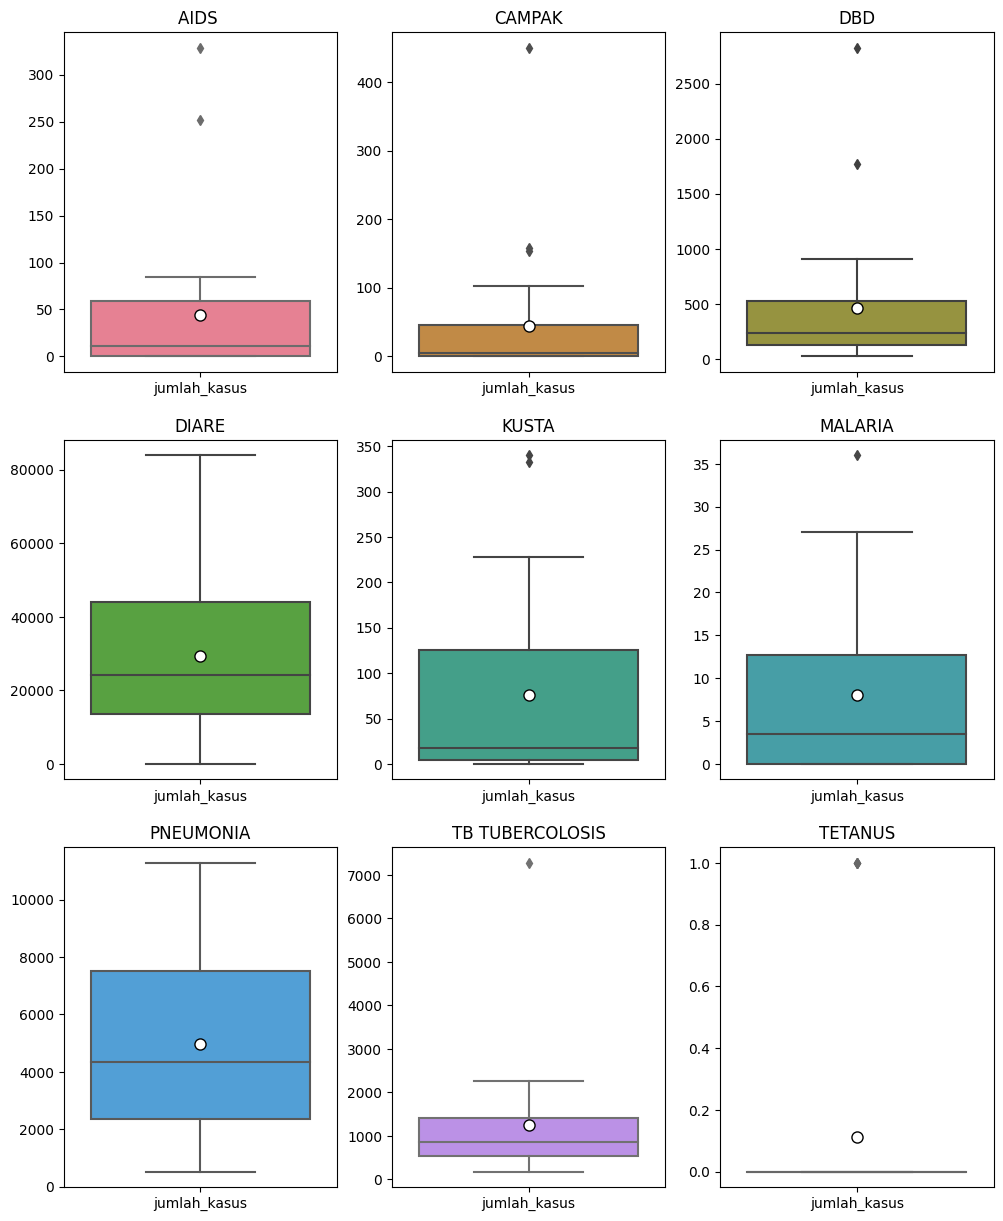

In [7]:
colors = sns.color_palette("husl", 9)

fig, axes = plt.subplots(3, 3)

for i, j in enumerate(sorted(df['jenis_penyakit'].unique())):
    row = i % 3
    column = i // 3
    sns.boxplot(
        df[df['jenis_penyakit'] == j], ax=axes[column][row],
        color=colors[i], showmeans=True, meanprops={
            'marker':'o','markerfacecolor':'white',
            'markeredgecolor':'black','markersize':'8'
        })
    axes[column][row].set_title(j)

fig.set_size_inches(12, 15)

## **Jumlah Kasus Menyeluruh berdasarkan Jenis Penyakit**

In [8]:
df.groupby('jenis_penyakit')['jumlah_kasus'].sum()

jenis_penyakit
AIDS                 1187
CAMPAK               1220
DBD                 12492
DIARE              794328
KUSTA                2042
MALARIA               209
PNEUMONIA          134530
TB TUBERCOLOSIS     33883
TETANUS                 3
Name: jumlah_kasus, dtype: int64

***
# **Himpunan**

## **Himpunan Kabupaten/Kota dan Jenis Penyakit**

In [9]:
him_kota = set(df['nama_kabupaten_kota'].sort_values())
him_penyakit = set(df['jenis_penyakit'].sort_values())

print(f'Himpunan Kabupaten Kota = {him_kota}'
      f'\nHimpunan Jenis Penyakit = {him_penyakit}')

Himpunan Kabupaten Kota = {'KABUPATEN CIANJUR', 'KOTA CIMAHI', 'KOTA SUKABUMI', 'KABUPATEN BEKASI', 'KABUPATEN SUKABUMI', 'KABUPATEN CIAMIS', 'KOTA BEKASI', 'KABUPATEN BANDUNG BARAT', 'KABUPATEN PURWAKARTA', 'KABUPATEN BANDUNG', 'KABUPATEN SUBANG', 'KABUPATEN MAJALENGKA', 'KOTA BOGOR', 'KABUPATEN KARAWANG', 'KABUPATEN KUNINGAN', 'KOTA BANDUNG', 'KABUPATEN BOGOR', 'KABUPATEN TASIKMALAYA', 'KOTA BANJAR', 'KABUPATEN GARUT', 'KOTA TASIKMALAYA', 'KABUPATEN INDRAMAYU', 'KABUPATEN CIREBON', 'KABUPATEN SUMEDANG', 'KOTA DEPOK', 'KABUPATEN PANGANDARAN', 'KOTA CIREBON'}
Himpunan Jenis Penyakit = {'PNEUMONIA', 'DBD', 'DIARE', 'KUSTA', 'TB TUBERCOLOSIS', 'TETANUS', 'AIDS ', 'CAMPAK', 'MALARIA'}


In [10]:
print('Panjang masing - masing himpunan:'
      f'\n|Kabupaten Kota| = {len(him_kota)}'
      f'\n|Jenis Penyakit| = {len(him_penyakit)}')

Panjang masing - masing himpunan:
|Kabupaten Kota| = 27
|Jenis Penyakit| = 9


## **Penyebaran Penyakit tiap Kabupaten/Kota**

### **Kabupaten/Kota dengan Jumlah Kasus di bawah Kuartil 1**

In [18]:
penyakit_kota_0_25 = dict()

for i in him_penyakit:
    x = df[(df['jenis_penyakit'] == i)]
    x = x[x['jumlah_kasus'] <= x['jumlah_kasus'].quantile(0.25)]
    x = set(x['nama_kabupaten_kota'])

    if x: penyakit_kota_0_25[i] = x

print('Panjang himpunan setiap penyakit:')
for i in penyakit_kota_0_25:
    print(f'{i}\t: {len(penyakit_kota_0_25[i])}'.expandtabs(17))

Panjang himpunan setiap penyakit:
PNEUMONIA        : 7
DBD              : 7
DIARE            : 7
KUSTA            : 8
TB TUBERCOLOSIS  : 7
TETANUS          : 24
AIDS             : 11
CAMPAK           : 10
MALARIA          : 9


In [30]:
for i in penyakit_kota_0_25:
    print(i)
    for j in penyakit_kota_0_25[i]:
        print(j, end=', ')
    print('\b\b\n')

PNEUMONIA
KOTA CIMAHI, KOTA SUKABUMI, KABUPATEN BEKASI, KABUPATEN KUNINGAN, KOTA TASIKMALAYA, KABUPATEN PANGANDARAN, KOTA BANJAR, 

DBD
KABUPATEN CIANJUR, KOTA BANJAR, KABUPATEN CIAMIS, KABUPATEN KARAWANG, KABUPATEN PANGANDARAN, KABUPATEN MAJALENGKA, KOTA CIREBON, 

DIARE
KOTA CIMAHI, KOTA SUKABUMI, KOTA TASIKMALAYA, KABUPATEN INDRAMAYU, KABUPATEN PANGANDARAN, KABUPATEN MAJALENGKA, KOTA BANJAR, 

KUSTA
KOTA CIMAHI, KOTA BANJAR, KOTA SUKABUMI, KABUPATEN BANDUNG BARAT, KABUPATEN BANDUNG, KOTA TASIKMALAYA, KOTA BANDUNG, KABUPATEN TASIKMALAYA, 

TB TUBERCOLOSIS
KOTA CIMAHI, KOTA BANJAR, KOTA SUKABUMI, KOTA TASIKMALAYA, KABUPATEN SUBANG, KABUPATEN PANGANDARAN, KOTA CIREBON, 

TETANUS
KABUPATEN CIANJUR, KOTA CIMAHI, KOTA SUKABUMI, KABUPATEN BEKASI, KABUPATEN SUKABUMI, KABUPATEN CIAMIS, KOTA BEKASI, KABUPATEN BANDUNG BARAT, KABUPATEN PURWAKARTA, KABUPATEN SUBANG, KABUPATEN MAJALENGKA, KOTA BOGOR, KABUPATEN KARAWANG, KABUPATEN KUNINGAN, KABUPATEN TASIKMALAYA, KOTA BANJAR, KABUPATEN G

/usr/local/lib/python3.10/dist-packages/matplotlib_venn/_venn3.py:117: UserWarning: Bad circle positioning
  warnings.warn("Bad circle positioning")


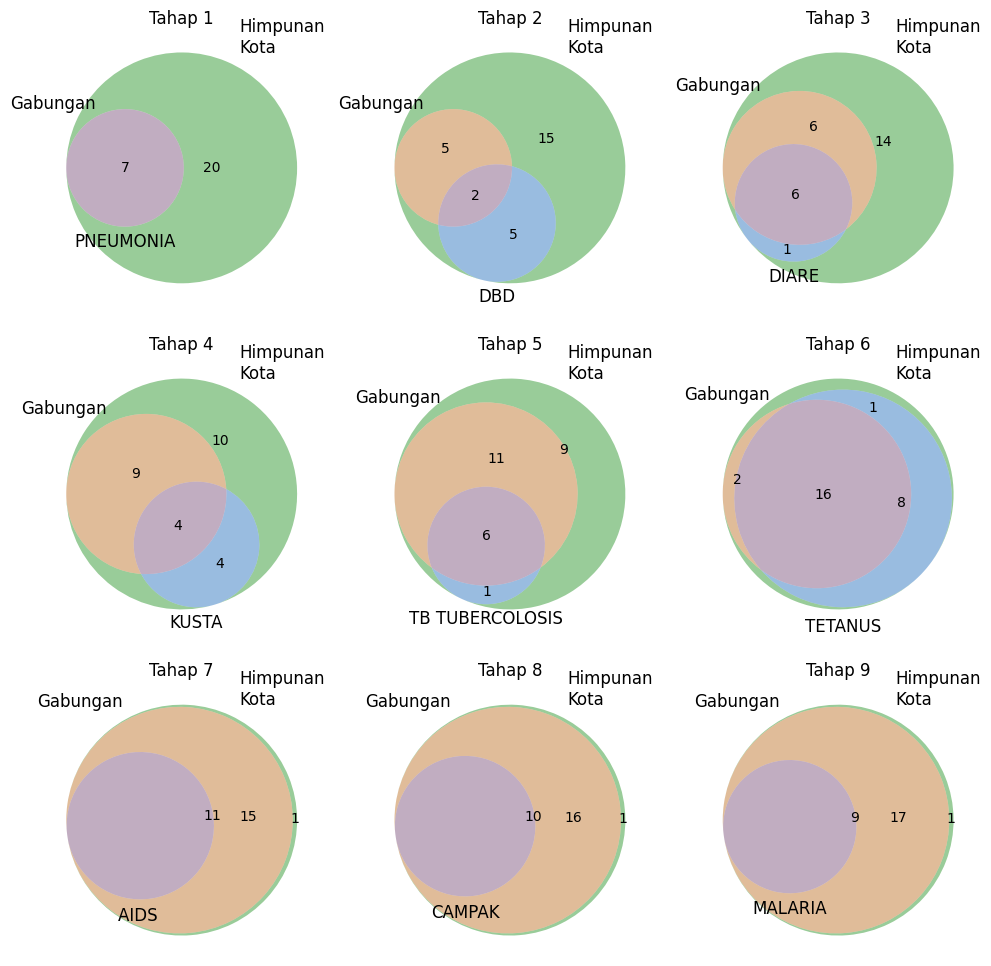


Jumlah kabupaten/kota dengan minimal ada satu jenis penyebaran penyakit terendah:
26

Kabupaten/Kota yang tidak terdapat satu jenis penyebaran penyakit terendah:
{'KABUPATEN BOGOR'}


In [12]:
fig, axes = plt.subplots(3, 3)

A = set(list(penyakit_kota_0_25.values())[0])

for i in range(len(penyakit_kota_0_25)):
    penyakit = list(penyakit_kota_0_25.keys())[i]
    B = set(list(penyakit_kota_0_25.values())[i])

    row = i % 3
    column = i // 3
    venn = venn3(
        [A, him_kota, B],
        ['Gabungan', 'Himpunan\nKota', penyakit],
        ax=axes[column][row]
    )
    venn.hide_zeroes()
    axes[column][row].set_title(f'Tahap {i+1}')

    A = A | B

fig.set_size_inches(12, 12)
plt.show()

print(f'\nJumlah kabupaten/kota dengan minimal ada satu jenis penyebaran penyakit terendah:'
      f'\n{len(A)}\n'
      f'\nKabupaten/Kota yang tidak terdapat satu jenis penyebaran penyakit terendah:'
      f'\n{him_kota - A}')

### **Kabupaten/Kota dengan Jumlah Kasus di antara Kuartil 1 dan Kuartil 3**

In [13]:
penyakit_kota_25_75 = dict()

for i in him_penyakit:
    x = df[(df['jenis_penyakit'] == i)]
    x = x[x['jumlah_kasus'] > x['jumlah_kasus'].quantile(0.25)]
    x = x[x['jumlah_kasus'] < x['jumlah_kasus'].quantile(0.75)]
    x = set(x['nama_kabupaten_kota'])

    if x: penyakit_kota_25_75[i] = x

print('Panjang himpunan setiap penyakit:')
for i in penyakit_kota_25_75:
    print(f'{i}\t: {len(penyakit_kota_25_75[i])}'.expandtabs(17))

Panjang himpunan setiap penyakit:
PNEUMONIA        : 15
DBD              : 15
DIARE            : 15
KUSTA            : 14
TB TUBERCOLOSIS  : 15
AIDS             : 12
CAMPAK           : 12
MALARIA          : 12


In [33]:
for i in penyakit_kota_25_75:
    print(i)
    for j in penyakit_kota_25_75[i]:
        print(j, end=', ')
    print('\b\b\n')

PNEUMONIA
KOTA BOGOR, KABUPATEN CIANJUR, KABUPATEN CIAMIS, KOTA BEKASI, KABUPATEN KARAWANG, KABUPATEN BANDUNG BARAT, KABUPATEN PURWAKARTA, KABUPATEN GARUT, KOTA CIREBON, KABUPATEN SUMEDANG, KOTA DEPOK, KABUPATEN SUBANG, KABUPATEN BOGOR, KABUPATEN TASIKMALAYA, KABUPATEN MAJALENGKA, 

DBD
KOTA BOGOR, KOTA CIMAHI, KOTA SUKABUMI, KOTA BEKASI, KABUPATEN BEKASI, KABUPATEN BANDUNG BARAT, KABUPATEN PURWAKARTA, KABUPATEN KUNINGAN, KABUPATEN GARUT, KABUPATEN SUKABUMI, KOTA TASIKMALAYA, KABUPATEN CIREBON, KABUPATEN SUMEDANG, KABUPATEN SUBANG, KABUPATEN TASIKMALAYA, 

DIARE
KOTA BOGOR, KABUPATEN CIAMIS, KOTA BEKASI, KABUPATEN BEKASI, KABUPATEN BANDUNG BARAT, KABUPATEN PURWAKARTA, KABUPATEN KUNINGAN, KOTA CIREBON, KABUPATEN BANDUNG, KABUPATEN SUKABUMI, KABUPATEN CIREBON, KABUPATEN SUMEDANG, KOTA DEPOK, KABUPATEN SUBANG, KABUPATEN TASIKMALAYA, 

KUSTA
KOTA BOGOR, KABUPATEN CIANJUR, KABUPATEN CIAMIS, KOTA BEKASI, KABUPATEN PURWAKARTA, KABUPATEN KUNINGAN, KABUPATEN GARUT, KABUPATEN SUKABUMI, KAB

/usr/local/lib/python3.10/dist-packages/matplotlib_venn/_venn3.py:117: UserWarning: Bad circle positioning
  warnings.warn("Bad circle positioning")


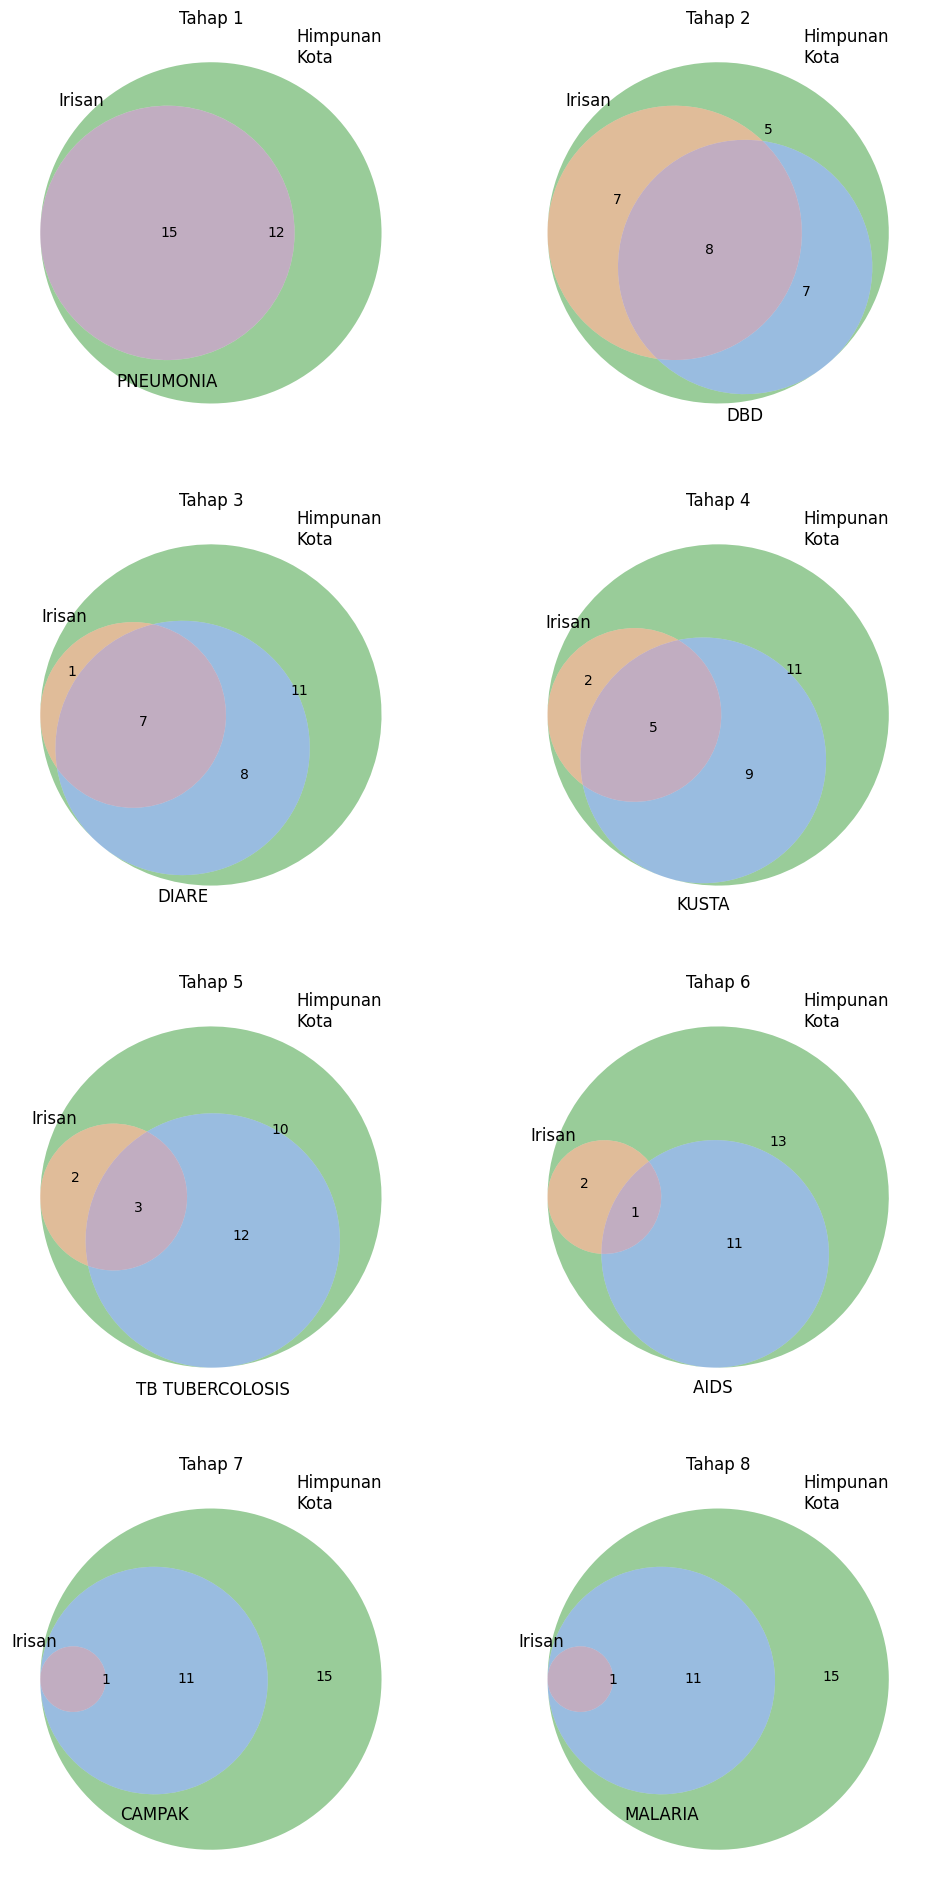

Jumlah kabupaten/kota dengan seluruh jenis penyebaran penyakit menengah kecuali Tetanus:
1

Kabupaten/Kota dengan seluruh jenis penyebaran penyakit menengah kecuali Tetanus:
{'KABUPATEN PURWAKARTA'}


In [14]:
fig, axes = plt.subplots(4, 2)

A = set(list(penyakit_kota_25_75.values())[0])

for i in range(len(penyakit_kota_25_75)):
    penyakit = list(penyakit_kota_25_75.keys())[i]
    B = set(list(penyakit_kota_25_75.values())[i])

    row = i % 2
    column = i // 2
    venn = venn3(
        [A, him_kota, B],
        ['Irisan', 'Himpunan\nKota', penyakit],
        ax=axes[column][row]
    )
    venn.hide_zeroes()
    axes[column][row].set_title(f'Tahap {i+1}')

    A = A & B

fig.set_size_inches(12, 24)
plt.show()

print(f'Jumlah kabupaten/kota dengan seluruh jenis penyebaran penyakit menengah kecuali Tetanus:'
      f'\n{len(A)}\n'
      f'\nKabupaten/Kota dengan seluruh jenis penyebaran penyakit menengah kecuali Tetanus:'
      f'\n{A}')

### **Kabupaten/Kota dengan Jumlah Kasus di atas Kuartil 3**

In [15]:
penyakit_kota_75 = dict()

for i in him_penyakit:
    x = df[(df['jenis_penyakit'] == i) & (df['jumlah_kasus'] != 0)]
    x = x[x['jumlah_kasus'] >= x['jumlah_kasus'].quantile(0.75)]
    x = set(x['nama_kabupaten_kota'])

    if x: penyakit_kota_75[i] = x

print('Panjang himpunan setiap penyakit:')
for i in penyakit_kota_75:
    print(f'{i}\t: {len(penyakit_kota_75[i])}'.expandtabs(17))

Panjang himpunan setiap penyakit:
PNEUMONIA        : 7
DBD              : 7
DIARE            : 7
KUSTA            : 7
TB TUBERCOLOSIS  : 7
TETANUS          : 3
AIDS             : 4
CAMPAK           : 5
MALARIA          : 5


In [32]:
for i in penyakit_kota_75:
    print(i)
    for j in penyakit_kota_75[i]:
        print(j, end=', ')
    print('\b\b\n')

PNEUMONIA
KABUPATEN KARAWANG, KABUPATEN GARUT, KABUPATEN BANDUNG, KABUPATEN SUKABUMI, KABUPATEN INDRAMAYU, KABUPATEN CIREBON, KOTA BANDUNG, 

DBD
KOTA BOGOR, KOTA BEKASI, KABUPATEN BANDUNG, KABUPATEN INDRAMAYU, KOTA BANDUNG, KOTA DEPOK, KABUPATEN BOGOR, 

DIARE
KABUPATEN CIANJUR, KABUPATEN KARAWANG, KABUPATEN GARUT, KABUPATEN BANDUNG, KABUPATEN CIREBON, KOTA BANDUNG, KABUPATEN BOGOR, 

KUSTA
KOTA BEKASI, KABUPATEN KARAWANG, KABUPATEN BEKASI, KABUPATEN INDRAMAYU, KABUPATEN CIREBON, KABUPATEN SUBANG, KABUPATEN BOGOR, 

TB TUBERCOLOSIS
KOTA BEKASI, KABUPATEN BEKASI, KABUPATEN BANDUNG, KABUPATEN SUKABUMI, KABUPATEN CIREBON, KOTA DEPOK, KABUPATEN BOGOR, 

TETANUS
KABUPATEN BOGOR, KOTA BANDUNG, KABUPATEN BANDUNG, 

AIDS 
KOTA BOGOR, KOTA TASIKMALAYA, KOTA SUKABUMI, KABUPATEN INDRAMAYU, 

CAMPAK
KOTA BOGOR, KABUPATEN CIANJUR, KABUPATEN INDRAMAYU, KABUPATEN CIREBON, KOTA DEPOK, 

MALARIA
KOTA CIMAHI, KOTA BEKASI, KABUPATEN SUKABUMI, KOTA BANDUNG, KABUPATEN TASIKMALAYA, 



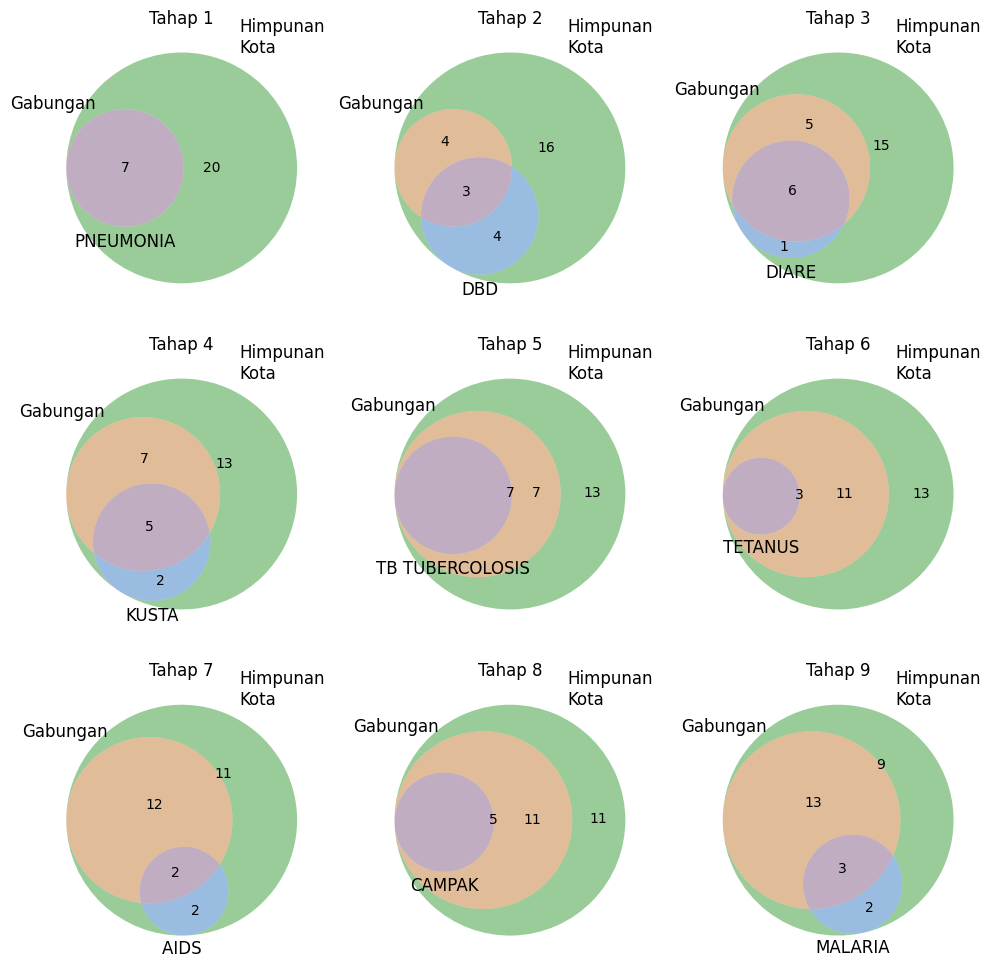


Jumlah kabupaten/kota dengan minimal ada satu jenis penyebaran penyakit tertinggi:
18

Kabupaten/Kota yang tidak terdapat satu jenis penyebaran penyakit tertinggi:
{'KABUPATEN CIAMIS', 'KABUPATEN BANDUNG BARAT', 'KABUPATEN PURWAKARTA', 'KABUPATEN KUNINGAN', 'KOTA CIREBON', 'KABUPATEN SUMEDANG', 'KABUPATEN PANGANDARAN', 'KABUPATEN MAJALENGKA', 'KOTA BANJAR'}


In [16]:
fig, axes = plt.subplots(3, 3)

A = set(list(penyakit_kota_75.values())[0])

for i in range(len(penyakit_kota_75)):
    penyakit = list(penyakit_kota_75.keys())[i]
    B = set(list(penyakit_kota_75.values())[i])

    row = i % 3
    column = i // 3
    venn = venn3(
        [A, him_kota, B],
        ['Gabungan', 'Himpunan\nKota', penyakit],
        ax=axes[column][row]
    )
    venn.hide_zeroes()
    axes[column][row].set_title(f'Tahap {i+1}')

    A = A | B

fig.set_size_inches(12, 12)
plt.show()

print(f'\nJumlah kabupaten/kota dengan minimal ada satu jenis penyebaran penyakit tertinggi:'
      f'\n{len(A)}\n'
      f'\nKabupaten/Kota yang tidak terdapat satu jenis penyebaran penyakit tertinggi:'
      f'\n{him_kota - A}')

***
# ***TEMP***